# Modelos de crecimiento

La modelización matemática nos ayuda a representar y comprender la realidad. La realidad es muy compleja, por lo que en estos modelos se debe hacer un proceso de simplificación lo cual no implica que puedan ser bastante precisos. En este notebook expondremos dos modelos matemáticos clásicos de crecimiento: el modelo de Malthus y el modelo de Verlhust (ecuación logística). Se considera que el modelo de Verhulst es una versión mejorada del modelo de Malthus, y tiene diversas aplicaciones en crecimiento de poblaciones, crecimiento de tumores, en economía,... y en concreto, lo usaremos en nuestro proyecto para modelar el crecimiento de bacterias.

## Modelo de Malthus

Este modelo fue propuesto por Malthus en 1798 por el economista y demógrafo Thomas Malthus para el crecimiento de poblaciones.

Sea $N(t)$ la densidad de población en el instante de tiempo $t$. Haremos un modelo continuo, esto es, que lo modelizaremos con una ecuación diferencial. Tendremos una ecuación que relacionará $N(t)$ con su derivada $N'(t)$. Nótese, que la derivada es la velocidad con la que crece la población (la derivada tiene intrínseco este concepto de tasa de cambio o velocidad).


En este modelo consideramos que las muertes y los nacimientos son proporcionales a la propia población. Es decir, consideraremos que la velocidad a la que crece la población por los nacimientos es $aN(t)$ mietras que decrece por la muertes a velocidad $bN(t)$ con $a$ y $b$ la tasa de nacimiento y muerte respectivamente (constantes positivas). La velocidad de crecimiento de la población $N'(t)$ será por tanto la tasa de nacimiento $aN(t)$ menos la tasa de muerte $bN(t)$.
Obteniendo la ecuación de este modelo:
$$N'(t)=aN(t)-bN(t)=kN(t), \quad k\in\mathbb{R}$$
Donde la $k$ es la tasa de crecimiento de la población (constante). Esta ecuación implica que si la constante $k$ es positiva entonces la población crecerá sin límite alguno mientras que si es negativa irá decreciendo cada vez más hasta llegar a ser prácticamente nula. Este crecimiento será de hecho a una velocidad exponencial y, esto es por la presunción de que la velocidad de crecimiento es proporcional a la población.

Esta ecuación es muy sencilla de resolver, es una ecuación diferencial ordinaria lineal la cual tiene existencia de solución. Su solución explícita es 
$N(t)=Ce^{kt}$ con $C\in \mathbb{R}$ una constante cualquiera (tiene infinitas soluciones). Para que el problema esté bien planteado con existencia y unicidad de solución debemos imponer una condición inicial, es decir, especificar el valor de la densidad de la población en un instante $t_{0}$ concreto, $N(t_{0})=N_{0}\ge 0$ cuya solución sería  $N(t)=N_{0}e^{k(t-t_{0})}$.

La limitación de este modelo es suponer que las poblaciones crecen de forma exponencial ilimitadamente aunque se ha comprobado que para intervalos de tiempos cortos nos da una estimación aceptable de la realidad. Se ha usado para modelos de poblaciones de bacterias, poblaciones de pequeños mamíferos e incluso para población humana.



### Laboratorio: Experimenta con el modelo de Malthus

Vamos a proponer un código para visualizar cual sería el comportamiento de una población según sus constantes $k, N_{0}, t_{0}$. Podremos ajustar estas constantes y ver que soluciones diferentes obtenemos

In [6]:
from numpy import *
import pylab
%matplotlib inline
 
def Malthus(t0,N0,k):
    x = linspace(t0,t0+20,100) # 100 puntos linealmente espaciados entre t0 y t0+20
    y = N0*exp(k*(x-t0))# calcula los valores para cada punto según la ecuación de malthus
    pylab.plot(x,y)
    pylab.xlabel('Tiempo')
    pylab.ylabel('Densidad de poblacion')
    pylab.title('Modelo de Malthus')
    pylab.xlim(-5,25)
    pylab.show()

Usaremos esta función Malthus para hacer diversas gráficas de población. Proponemos que altereis los valores de densidad inicial de población, el instante incial y la tasa de crecimiento para que experimentéis como va cambiando el modelo según lo que hemos propuesto en la parte teórica.

**Sugerencias**: Prueba con valores positivos y negativos de $k$, ¿Qué ocurre cuando agrandamos el $k$? ¿Qué pasa si N0 es 0? ¿Qué papel juega el instante inicial en el modelo?

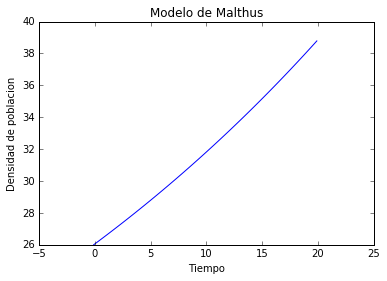

In [16]:
#Modelo interactivo
from IPython.html.widgets import *
interact(Malthus,t0=(-5,5,0.1),N0=(0,50,0.1),k=(-1,1,0.01))

## Modelo de Verhulst (o ecuación logística)

El matemático belga Verhulst propuso el modelo logístico como una mejora del modelo malthusiano. En este modelo corregimos una de las de las asunciones más artificiales del modelo malthusiano que es el crecimiento ilimitado de la población, ya que en muchos casos vivimos en un medio finito y ese crecimiento puede ser irreal, ya sea por falta de recursos, espacio... 

Se propone la competencia entre individuos de la misma población de tal manera que altere los nacimientos y/o las muertes. La competencia puede ser la lucha por alimentos o sobrevivir al contagio de enfermedades. Es razonable pensar que cualquiera que sea el caso medir dicha competencia por medio del número de contactos posibles entre dos individuos de
la especie: el número de tales contactos, cuando se dispone de N individuos en total, es $\binom {N} {2}=\frac{1}{2}N(N-1)$ (N elementos escogidos de 2 en 2 sin repetición). Obtenemos así la ecuación:

$$N'(t)=k_{1}N(t)-k_{2}\frac{N(t)(N(t)-1))}{2}\Rightarrow N'(t)=rN(t)\left(1-\frac{N(t)}{P}\right)$$
Podemos leer esta ecuación de la siguiente manera. El primer sumando es el componente malthusiano el cual nos refleja el crecimiento exponencial de la población mientras que el segundo sumando nos indica la interacción entre individuos. Si este término es positivo indica que la interacción es positiva y cuanto más individuos haya más rápido crecerá la población mientras que si es negativa indica lo contrario. En este caso, como estamos en un tema de competencia este término será negativo. Esta vez, la tasa de crecimiento no es constante, depende del número de individuos $\frac{N'(t)}{N(t)}=r\left(1-\frac{N(t)}{P}\right)$.
Las constantes las hemos renombrado como $r=k_{1}-\frac{1}{2}k_{2}$ y $P=2\frac{k_{1}}{k_{2}}+1$. En concreto, $r$ representa la tasa de crecimiento intrínseca del modelo (tasa de nacimientos menos la tasa de muertes). Por otro lado, $P$ es la carga máxima de la población, el número máximo de individuos que puede tener.  Cuánto más próximo sea el valor de la población al de $P$ más lenta crecerá.
Esta ecuación diferencial es de variables separadas y se puede resolver de forma explícita (con existencia y unicidad de solución si damos una condición inicial):
$$N(t)=\frac{N_{0}P}{N_{0}+(P-N_{0})e^{-r(t-t_{0})}},$$
donde $N_{0}=N(t_{0})$ una condición inicial dada.

### Laboratorio: Experimenta con el modelo de Verhulst

In [14]:
def Verhulst(t0,N0,r,P):
    x = linspace(t0,t0+70,100) # 100 puntos linealmente espaciados entre t0 y t0+20
    y = (N0*P)/(N0+(P-N0)*exp(-r*(x-t0)))# calcula los valores para cada punto según la ecuación de malthus
    pylab.plot(x,y)
    pylab.xlabel('Tiempo')
    pylab.ylabel('Densidad de poblacion')
    pylab.title('Modelo de Verhulst')
    pylab.xlim(-10,80)
    pylab.show()

**Sugerencias**:  ¿Qué ocurre cuando agrandamos el $r$? ¿Qué pasa si N0 es 0? ¿Qué pasa si N0 es P? ¿Qué ocurre si N0 es mayor que P? ¿Y si P es mayor que N0? ¿Cómo interpretas todo esto?

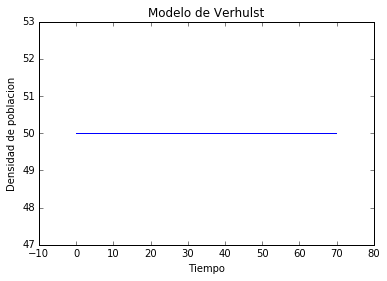

In [15]:
interact(Verhulst,t0=(-10,10,0.1),N0=(0,50,1),r=(0,1,0.01),P=(0,50,1))

## Bibliografía

- Müller, Johannes; Kuttler, Christina **Methods and models in mathematical biology. Deterministic and stochastic approaches.** Lecture Notes on Mathematical Modelling in the Life Sciences. Springer, Heidelberg, 2015. xiii+711 pp. ISBN: 978-3-642-27250-9
- Chou, Ching-Shan; Friedman, Avner **Introduction to mathematical biology. Modeling, analysis, and simulations.** Springer Undergraduate Texts in Mathematics and Technology. Springer, [Cham], 2016. vii+172 pp. ISBN: 978-3-319-29636-4